In [4]:
import os
import pandas as pd
os.chdir("C:/Users/Hai/Desktop/insofe/Week10/20180818_Batch_46_CSE_7305c_SVM_RF_Lab04")


In [5]:
housing=pd.read_csv("Housing.csv",na_values=["?",","])
print(housing.shape)
print(type(housing))

(506, 14)
<class 'pandas.core.frame.DataFrame'>


In [6]:
housing.shape

(506, 14)

In [7]:
print(housing.columns)
print(housing.dtypes)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [8]:
housing["MEDV"].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
        ..
12.3     1
37.6     1
29.4     1
12.6     1
22.1     1
31.1     1
48.3     1
26.2     1
11.0     1
9.5      1
12.0     1
17.7     1
44.8     1
35.1     1
32.4     1
42.3     1
28.2     1
31.2     1
33.3     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

In [9]:
housing.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [10]:
housing.isnull().sum()

#housing.dropna()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
housing['CHAS']=housing['CHAS'].astype('category')
housing['RAD']=housing['RAD'].astype('category')

In [12]:
housing=pd.get_dummies(housing)

In [13]:
housing.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,...,0,0,0,1,0,0,0,0,0,0


In [14]:
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split

C:\Users\Hai\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Divide in to train and test
y=housing["MEDV"]
X=housing.drop('MEDV', axis=1)

#from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 22)
(102, 22)
(404,)
(102,)


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from sklearn import svm

In [21]:
model= svm.SVR(C=10,kernel='linear')  #svr for regression,svc-support vector classification
model.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
model.coef_  

array([[-1.34799239,  1.4166451 ,  0.03789848, -1.14399469,  3.27659641,
        -0.96453466, -2.58760078, -1.67307883, -1.41392569,  0.94359399,
        -1.69447308, -0.17166752,  0.17166752, -0.71597197, -0.37334902,
         0.0455944 , -0.48052788, -0.21735354, -0.44059835,  0.22997122,
         0.31347038,  1.12158823]])

In [23]:
model.intercept_

array([21.55829562])

In [24]:
# Predict on Test with max_depth=2,max_depth=5
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
print( 'R^2:', r2_score(y_test, y_pred ))



R^2: 0.7498689622156833


In [26]:
from sklearn.metrics import mean_absolute_error
print( 'MAE:', mean_absolute_error(y_test, y_pred))


MAE: 3.2681609897007977


In [27]:
from sklearn.metrics import mean_squared_error
print( 'RMSE:', mean_squared_error(y_test, y_pred))


RMSE: 25.872653461203246


In [28]:
model1= svm.SVR(C=10,kernel='rbf')
model1.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
# Predict on Test with max_depth=2,max_depth=5
y_pred = model1.predict(X_test)

In [30]:
print( 'R^2:', r2_score(y_test, y_pred ))
print( 'MAE:', mean_absolute_error(y_test, y_pred))
print( 'RMSE:', mean_squared_error(y_test, y_pred))



R^2: 0.8418904102458623
MAE: 2.3873350390270454
RMSE: 16.354286380601682


In [31]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]  #lies between 0 to inf try log space values
gammas = [0.001, 0.01, 0.1, 1]  #lies between 0 and 1,kernel specific parameter
param_grid = {'C': Cs, 'gamma' : gammas}
clf = GridSearchCV(svm.SVR(kernel='linear'), param_grid, n_jobs=4) # default is 3 fold
clf.fit(X=X_train, y=y_train)
svm_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.6840412027710361 {'C': 10, 'gamma': 0.001}


In [33]:
y_pred_test=svm_model.predict(X_test)
print( 'R^2:', r2_score(y_test, y_pred_test ))
print( 'MAE:', mean_absolute_error(y_test, y_pred_test))
print( 'RMSE:', mean_squared_error(y_test, y_pred_test))



R^2: 0.7498689622156833
MAE: 3.2681609897007977
RMSE: 25.872653461203246


In [1]:
#Random Forest


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RF = RandomForestRegressor(n_estimators=30)
RF.fit(X=X_train, y=y_train)
y_pred = RF.predict(X_test)

In [36]:
print("r2")
print(r2_score(y_test,y_pred_test))
print("RMSE")
print(mean_squared_error(y_test,y_pred_test))

r2
0.7498689622156833
RMSE
25.872653461203246


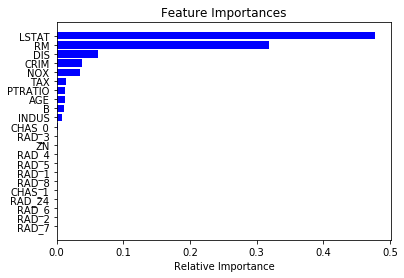

In [38]:
import numpy as np
import matplotlib.pyplot as plt
features = X.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [39]:
from sklearn.grid_search import GridSearchCV
RFR = RandomForestRegressor(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [10,20,30,40,50,60,70],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
CV_RFR = GridSearchCV(estimator=RFR, param_grid=param_grid, cv= 3)
CV_RFR.fit(X=X_train, y=y_train)
print (CV_RFR.best_score_, CV_RFR.best_params_) 

C:\Users\Hai\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.809752418599847 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 40}


In [40]:
y_pred_test=svm_model.predict(X_test)
print("r2")
print(r2_score(y_test,y_pred_test))
print("RMSE")

print(mean_squared_error(y_test,y_pred_test))

r2
0.7498689622156833
RMSE
25.872653461203246


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
GBR = GradientBoostingRegressor(n_estimators=40,learning_rate=0.5)
GBR.fit(X=X_train, y=y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = GBR.predict(X_test)
print("r2")
print(r2_score(y_test,y_pred))
print("RMSE")
print(mean_squared_error(y_test,y_pred))

r2
0.9098339034830976
RMSE
9.326456203898937


In [47]:
from sklearn.grid_search import GridSearchCV

 
 

In [48]:
GBM = GradientBoostingRegressor()
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50,60,70,80,90,100],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.3,0.5,0.7]}
 
CV_GB = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)
CV_GB.fit(X=X_train, y=y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.3, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [50]:
print (CV_GB.best_score_, CV_GB.best_params_) 

0.877300648720553 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [51]:
y_pred = CV_GB.predict(X_test)
print("r2")
print(r2_score(y_test,y_pred))
print("RMSE")
print(mean_squared_error(y_test,y_pred))

r2
0.9138626025528905
RMSE
8.909742085349189
